In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import streamlit as st
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import altair as alt
from wordcloud import WordCloud
import plotly.express as px
from ADD import db_execute_fetch



In [33]:
def loadData():
    query = "SELECT * FROM xdr_data"
    df = db_execute_fetch(query, dbName="telecome", rdf=True)
    return df



In [34]:
df=loadData()

In [35]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [37]:

# Check if any column has missing values
missing_columns = [col for col in df.columns if df[col].isnull().any()]

if len(missing_columns) > 0:
    print("Some columns have missing values:")
    print(missing_columns)
else:
    print("All columns are preprocessed.")

Some columns have missing values:
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Total UL (

## Data Preprocessing 
* Fill Missing Value

In [38]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with the column mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

* Date conversion

In [41]:
# Data type conversion
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

* Future Scaling
* Encoding categorical variables
* Handling outliers
* Feature engineering

In [43]:
# Feature scaling
scaler = MinMaxScaler()
df[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']] = scaler.fit_transform(df[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']])

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Last Location Name'] = label_encoder.fit_transform(df['Last Location Name'])

# Handling outliers (example using z-score approach)
z_scores = (df['Dur. (ms)'] - df['Dur. (ms)'].mean()) / df['Dur. (ms)'].std()
df = df[(z_scores < 3)]  # Keep only data within 3 standard deviations

# Feature engineering (example: extracting month and day from 'Start' column)
df['Start_month'] = df['Start'].dt.month
df['Start_day'] = df['Start'].dt.day

In [16]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start_month,Start_day
75,7.349883e+18,2019-04-21 19:02:00,601.0,2019-04-25 00:30:00,766.0,0.797875,2.082015e+14,3.361644e+10,3.543841e+13,22657,...,17649000.0,13165493.0,72632880.0,5527143.0,816409319.0,8334164.0,0.623698,0.102728,4.0,21.0
79,1.311448e+19,2019-04-21 21:53:00,450.0,2019-04-25 02:38:00,201.0,0.790299,2.082015e+14,3.377802e+10,8.692440e+13,24873,...,18167225.0,12583847.0,341133991.0,5103940.0,620611207.0,4175632.0,0.343158,0.399608,4.0,21.0
80,1.311448e+19,2019-04-21 21:53:00,407.0,2019-04-25 00:01:00,444.0,0.762692,2.082021e+14,3.366132e+10,3.530731e+13,12389,...,8422728.0,8984661.0,535813003.0,12130712.0,593258135.0,12188203.0,0.616448,0.627648,4.0,21.0
81,7.349883e+18,2019-04-22 00:14:00,5.0,2019-04-25 04:52:00,2.0,0.789145,2.082010e+14,3.366745e+10,8.645970e+13,21262,...,5472076.0,6665162.0,232777636.0,7811586.0,255369041.0,10007929.0,0.377906,0.269892,4.0,22.0
82,1.304243e+19,2019-04-22 00:35:00,293.0,2019-04-25 00:35:00,30.0,0.740137,2.082014e+14,3.366135e+10,8.654080e+13,13113,...,22600559.0,7052896.0,41301214.0,4605637.0,422321517.0,385786.0,0.207430,0.084727,4.0,22.0


## Task 1: User Overview Analysis

* top 10 handsets used by customers

In [20]:
# Identify the top 10 handsets used by customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print('Top 10 Handsets Used by Customers:')
print(top_10_handsets)

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19510
Apple iPhone 6S (A1688)          9184
Apple iPhone 6 (A1586)           8886
undefined                        8555
Apple iPhone 7 (A1778)           6250
Apple iPhone Se (A1723)          5064
Apple iPhone 8 (A1905)           4901
Apple iPhone Xr (A2105)          4469
Samsung Galaxy S8 (Sm-G950F)     4383
Apple iPhone X (A1901)           3759
Name: count, dtype: int64


* Top 3 handset Manufacturer

In [21]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print('\nTop 3 Handset Manufacturers:')
print(top_3_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      58427
Samsung    38970
Huawei     33838
Name: count, dtype: int64


* top 5 handsets per top 3 handset manufacturers

In [22]:

# Identify the top 5 handsets per top 3 handset manufacturers
top_3_manufacturer_list = top_3_manufacturers.index.tolist()
top_5_handsets_per_manufacturer = df[df['Handset Manufacturer'].isin(top_3_manufacturer_list)]
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).nlargest(5)
print('\nTop 5 Handsets per Top 3 Handset Manufacturers:')
print(top_5_handsets_per_manufacturer)


Top 5 Handsets per Top 3 Handset Manufacturers:
Handset Manufacturer  Handset Manufacturer  Handset Type                  
Apple                 Apple                 Apple iPhone 6S (A1688)            9184
                                            Apple iPhone 6 (A1586)             8886
                                            Apple iPhone 7 (A1778)             6250
                                            Apple iPhone Se (A1723)            5064
                                            Apple iPhone 8 (A1905)             4901
Huawei                Huawei                Huawei B528S-23A                  19510
                                            Huawei E5180                       2035
                                            Huawei P20 Lite Huawei Nova 3E     1965
                                            Huawei P20                         1441
                                            Huawei Y6 2018                      959
Samsung               Samsung       

#  Task 2.1: User Behavior Analysis

In [45]:


# Aggregate per user information on xDR sessions and application data
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

In [48]:

# Data Cleaning and Handling Missing Values
user_behavior.fillna(user_behavior.mean(), inplace=True)

 # Task 2.2: Exploratory Data Analysis (EDA)

In [49]:


# Describe relevant variables and associated data types
print('\nVariable Description:')
print(user_behavior.info())





Variable Description:
<class 'pandas.core.frame.DataFrame'>
Index: 106053 entries, 33601001722.0 to 337000037000919.0
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Bearer Id                106053 non-null  int64  
 1   Dur. (ms)                106053 non-null  float64
 2   Social Media DL (Bytes)  106053 non-null  float64
 3   Social Media UL (Bytes)  106053 non-null  float64
 4   Google DL (Bytes)        106053 non-null  float64
 5   Google UL (Bytes)        106053 non-null  float64
 6   Email DL (Bytes)         106053 non-null  float64
 7   Email UL (Bytes)         106053 non-null  float64
 8   Youtube DL (Bytes)       106053 non-null  float64
 9   Youtube UL (Bytes)       106053 non-null  float64
 10  Netflix DL (Bytes)       106053 non-null  float64
 11  Netflix UL (Bytes)       106053 non-null  float64
 12  Gaming DL (Bytes)        106053 non-null  float64
 13  Gaming UL (Bytes) 

In [47]:
# Analyze the basic metrics in the dataset
print('\nBasic Metrics:')
print('Mean:')
print(user_behavior.mean())
print('\nMedian:')
print(user_behavior.median())
print('\nStandard Deviation:')
print(user_behavior.std())


Basic Metrics:
Mean:
Bearer Id                  1.393520e+00
Dur. (ms)                  6.882316e-02
Social Media DL (Bytes)    2.502463e+06
Social Media UL (Bytes)    4.588657e+04
Google DL (Bytes)          8.014292e+06
Google UL (Bytes)          2.866050e+06
Email DL (Bytes)           2.496441e+06
Email UL (Bytes)           6.515835e+05
Youtube DL (Bytes)         1.620931e+07
Youtube UL (Bytes)         1.533879e+07
Netflix DL (Bytes)         1.620110e+07
Netflix UL (Bytes)         1.533069e+07
Gaming DL (Bytes)          5.881106e+08
Gaming UL (Bytes)          1.154903e+07
Other DL (Bytes)           5.868532e+08
Other UL (Bytes)           1.151766e+07
dtype: float64

Median:
Bearer Id                  1.000000e+00
Dur. (ms)                  5.040617e-02
Social Media DL (Bytes)    2.261843e+06
Social Media UL (Bytes)    4.147800e+04
Google DL (Bytes)          7.246417e+06
Google UL (Bytes)          2.589124e+06
Email DL (Bytes)           2.260703e+06
Email UL (Bytes)           5.86484


Non-Graphical Univariate Analysis:
Dispersion Parameters:
           Bearer Id      Dur. (ms)  Social Media DL (Bytes)  \
count  106053.000000  106053.000000             1.060530e+05   
mean        1.393520       0.068823             2.502463e+06   
std         3.321731       0.117151             6.146163e+06   
min         1.000000       0.000000             1.200000e+01   
25%         1.000000       0.032831             1.174653e+06   
50%         1.000000       0.050406             2.261843e+06   
75%         2.000000       0.086679             3.260661e+06   
max      1054.000000      32.428831             1.913182e+09   

       Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
count             1.060530e+05       1.060530e+05       1.060530e+05   
mean              4.588657e+04       8.014292e+06       2.866050e+06   
std               1.142238e+05       1.912777e+07       7.107218e+06   
min               0.000000e+00       2.070000e+02       3.000000e+00   
25% 

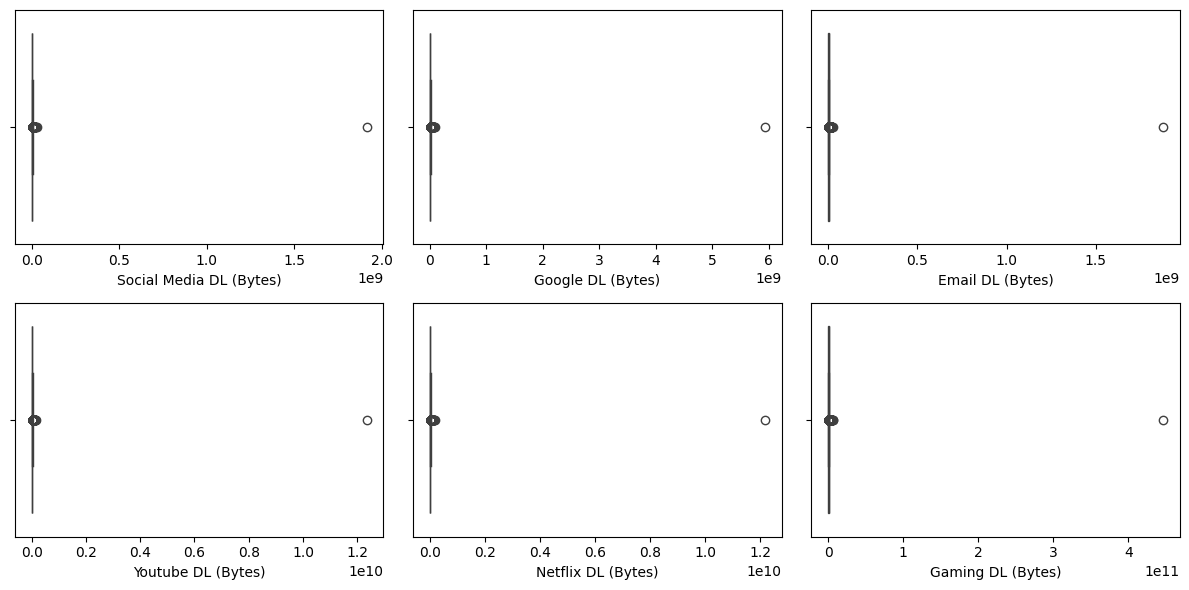

In [52]:
# Non-Graphical Univariate Analysis
print('\nNon-Graphical Univariate Analysis:')
print('Dispersion Parameters:')
print(user_behavior.describe())

# Graphical Univariate Analysis
print('\nGraphical Univariate Analysis:')
# Plotting options for each variable
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(x=user_behavior['Social Media DL (Bytes)'])
plt.subplot(2, 3, 2)
sns.boxplot(x=user_behavior['Google DL (Bytes)'])
plt.subplot(2, 3, 3)
sns.boxplot(x=user_behavior['Email DL (Bytes)'])
plt.subplot(2, 3, 4)
sns.boxplot(x=user_behavior['Youtube DL (Bytes)'])
plt.subplot(2, 3, 5)
sns.boxplot(x=user_behavior['Netflix DL (Bytes)'])
plt.subplot(2, 3, 6)
sns.boxplot(x=user_behavior['Gaming DL (Bytes)'])
plt.tight_layout()
plt.show()


Bivariate Analysis:


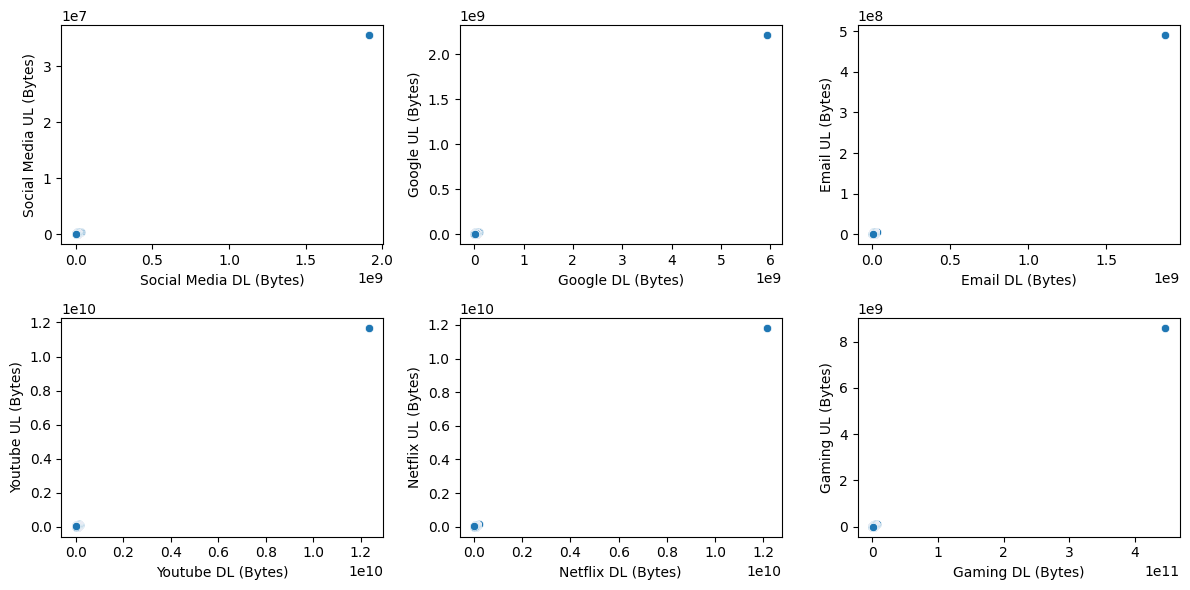

In [53]:
# Bivariate Analysis
print('\nBivariate Analysis:')
# Relationship between each application and the total download/upload data
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.scatterplot(x='Social Media DL (Bytes)', y='Social Media UL (Bytes)', data=user_behavior)
plt.subplot(2, 3, 2)
sns.scatterplot(x='Google DL (Bytes)', y='Google UL (Bytes)', data=user_behavior)
plt.subplot(2, 3, 3)
sns.scatterplot(x='Email DL (Bytes)', y='Email UL (Bytes)', data=user_behavior)
plt.subplot(2, 3, 4)
sns.scatterplot(x='Youtube DL (Bytes)', y='Youtube UL (Bytes)', data=user_behavior)
plt.subplot(2, 3, 5)
sns.scatterplot(x='Netflix DL (Bytes)', y='Netflix UL (Bytes)', data=user_behavior)
plt.subplot(2, 3, 6)
sns.scatterplot(x='Gaming DL (Bytes)', y='Gaming UL (Bytes)', data=user_behavior)
plt.tight_layout()
plt.show()

In [55]:
# Correlation Analysis
print('\nCorrelation Analysis:')
correlation_matrix = user_behavior[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                                   'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
print(correlation_matrix)


Correlation Analysis:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           0.959844   
Google DL (Bytes)                       0.959844           1.000000   
Email DL (Bytes)                        0.960338           0.959137   
Youtube DL (Bytes)                      0.960577           0.959553   
Netflix DL (Bytes)                      0.960114           0.958932   
Gaming DL (Bytes)                       0.960483           0.959383   
Other DL (Bytes)                        0.959820           0.958706   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.960338            0.960577   
Google DL (Bytes)                0.959137            0.959553   
Email DL (Bytes)                 1.000000            0.959990   
Youtube DL (Bytes)               0.959990            1.000000   
Netflix DL (Bytes)               0.959170            0.959849   
Gaming DL (Bytes) 